### Analyse einer Zeitreihe durch Zeit-Frequenz-Analyse (Testbeispiel)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot
from pandas import Series
import scipy.signal as sp
from scipy.signal import chirp
import numpy as np
#from spectrum import *
%matplotlib inline
from stockwell import st

In [2]:
Tmax = 10
fs = 500
t = np.linspace(0, Tmax, int(Tmax*fs))
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
fmin = 0  # Hz
fmax = 25  # Hz
df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
timeseries = w

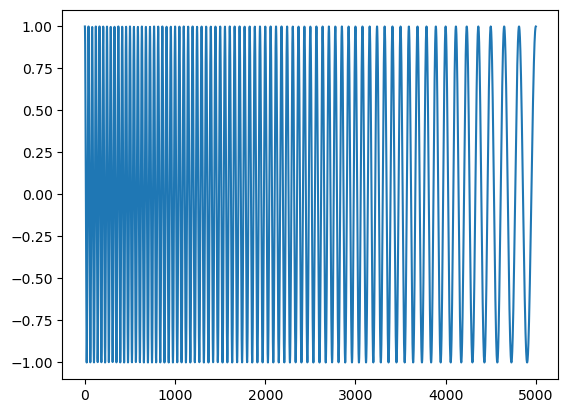

In [3]:
plt.figure()
plt.plot(timeseries)

Parametrierung der Stockwell Transformation: Zeit- und Frequenzachse

In [4]:
print("Frequenzauflösung:",df)
print("Abtastfrequenz:", fs)
print("f_max_samples:",fmax_samples)
print("Zeitreihenwerte:",len(t))

Frequenzauflösung: 0.1
Abtastfrequenz: 500
f_max_samples: 250
Zeitreihenwerte: 5000


Ausführen der Transformation

In [5]:
stock = st.st(timeseries, fmin_samples, fmax_samples)

In [6]:
stock.shape

(251, 5000)

Plot 

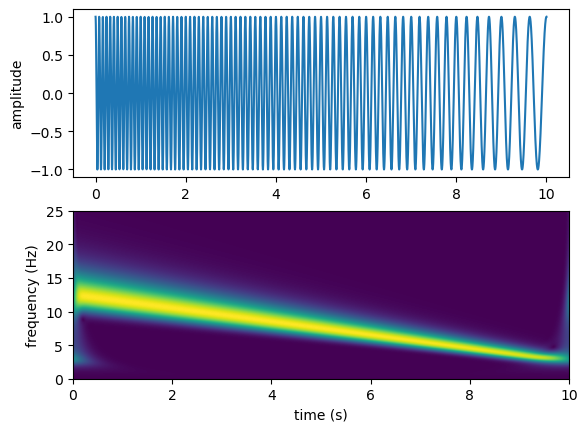

In [7]:
extent = (t[0], t[len(t)-1], fmin, fmax)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(stock) , shading='gouraud')
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

In [15]:
ff, tt, spectrogram = sp.spectrogram(timeseries, nperseg = 256, noverlap = 180, fs = fs)

In [16]:
spectrogram.shape

(129, 63)

In [17]:
# Frequenzbereich dem des Stockwell-Diagramms angleichen
# ff auf fmax verkürzen
# spectrogram abschneiden
spectrogram = spectrogram[ff  < fmax,:]

In [18]:
spectrogram.shape

(13, 63)

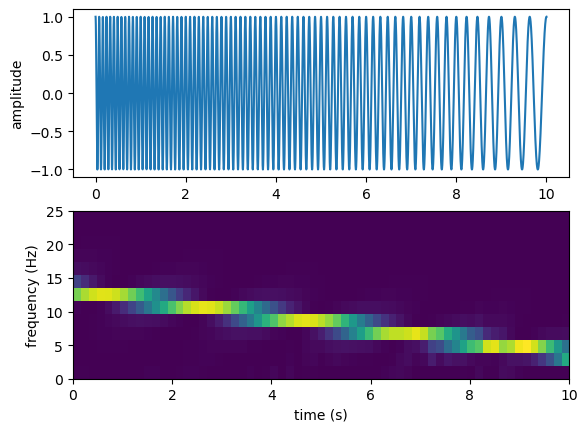

In [19]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(spectrogram), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(spectrogram) , shading='gouraud')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
#ax[1].set_ylim([fmin, fmax])
#ax[1].set_xlim([t[0], t[len(t)-1]])
ax[1].axis('tight')
plt.show()

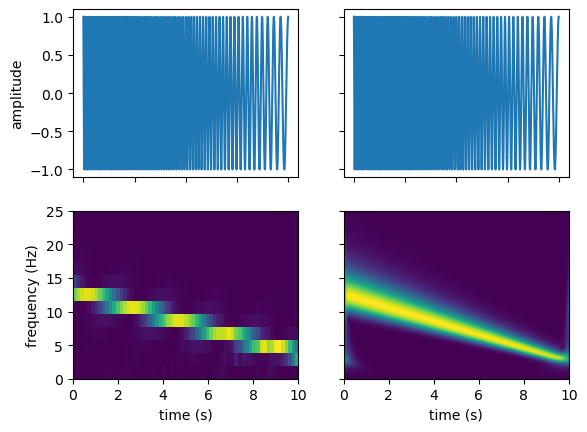

In [20]:
fig, ax = plt.subplots(2, 2)
# Plot Spectrogram
ax[0,0].plot(t, timeseries)
ax[0,0].set(ylabel='amplitude')
ax[1,0].imshow(np.abs(spectrogram), origin='lower', extent=extent)
ax[1,0].set(xlabel='time (s)', ylabel='frequency (Hz)')
ax[1,0].axis('tight')
# Plot Stockwell 
ax[0,1].plot(t, timeseries)
ax[0,1].set(ylabel='amplitude')
ax[1,1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1,1].axis('tight')
ax[1,1].set(xlabel='time (s)', ylabel='frequency (Hz)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
plt.show()

In [21]:
y = np.linspace(fmin,fmax,stock.shape[0])
x = t

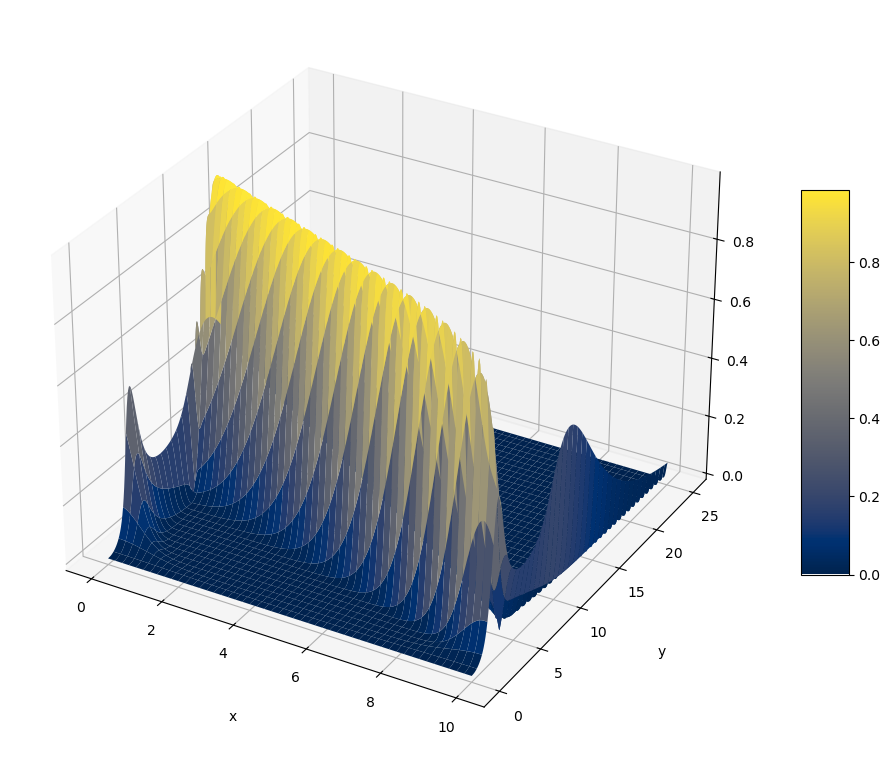

In [228]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(x, y)
Z = abs(stock)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()